In [1]:
# %%
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
#from experiment_utils import experiment
# %matplotlib widget

OTMol - ArbAlign

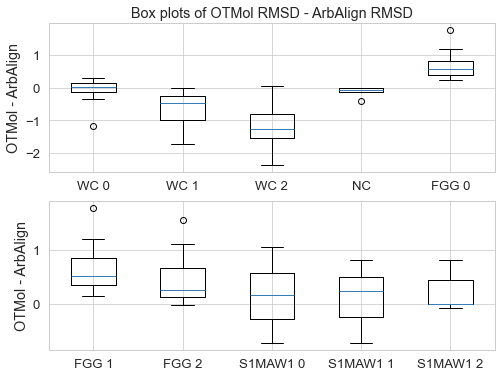

In [3]:
wc0_arbalign = pd.read_csv('./arbalign_output/ArbAlignDataWC_result.csv')['RMSD(ArbAlign)']
wc1_arbalign = pd.read_csv('./arbalign_output/1st2ndWC_result.csv')['RMSD(ArbAlign)']
wc2_arbalign = pd.read_csv('./arbalign_output/largest_RMSD_WC_result.csv')['RMSD(ArbAlign)']
ng_arbalign = pd.read_csv('./arbalign_output/NeonCluster_result.csv')['RMSD(ArbAlign)']
FGG_arbalign_name = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+element name)']
FGG_arbalign_type = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+atom type)']
FGG_arbalign_conn = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+atom connectivity)']
S1MAW1_arbalign_name = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+element name)']
S1MAW1_arbalign_type = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom type)']
S1MAW1_arbalign_conn = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom connectivity)']

wc0_otmol = pd.read_csv('./otmol_output/wc_ArbAlignDataWC_center_results.csv')['RMSD(OTMol)']
wc1_otmol = pd.read_csv('./otmol_output/wc_1st2nd_center_results.csv')['RMSD(OTMol)']
wc2_otmol = pd.read_csv('./otmol_output/wc_largest_rmsd_center_results.csv')['RMSD(OTMol)']
ng_otmol = pd.read_csv('./otmol_output/ng_emd_results.csv')['RMSD(OTMol)']
FGG_otmol_name = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.5_results.csv')['RMSD(OTMol+element name)']
FGG_otmol_type = pd.read_csv('./otmol_output/FGG_atom_type_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom type)']
FGG_otmol_conn = pd.read_csv('./otmol_output/FGG_atom_connectivity_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom connectivity)']
S1MAW1_otmol_name = pd.read_csv('./otmol_output/S1MAW1_element_name_fGW_cstD=1.0_results.csv')['RMSD(OTMol+element name)']
S1MAW1_otmol_type = pd.read_csv('./otmol_output/S1MAW1_atom_type_fGW_cstD=1.0_results.csv')['RMSD(OTMol+atom type)']
S1MAW1_otmol_conn = pd.read_csv('./otmol_output/S1MAW1_atom_connectivity_fGW_cstD=1.0_results.csv')['RMSD(OTMol+atom connectivity)']

wc0_diff = wc0_otmol - wc0_arbalign
wc1_diff = wc1_otmol - wc1_arbalign
wc2_diff = wc2_otmol - wc2_arbalign
ng_diff = ng_otmol - ng_arbalign
FGG_name_diff = FGG_otmol_name - FGG_arbalign_name
FGG_type_diff = FGG_otmol_type - FGG_arbalign_type
FGG_conn_diff = FGG_otmol_conn - FGG_arbalign_conn
S1MAW1_name_diff = S1MAW1_otmol_name - S1MAW1_arbalign_name
S1MAW1_type_diff = S1MAW1_otmol_type - S1MAW1_arbalign_type
S1MAW1_conn_diff = S1MAW1_otmol_conn - S1MAW1_arbalign_conn
all_data = [
    wc0_diff, wc1_diff, wc2_diff, ng_diff,
    FGG_name_diff, FGG_type_diff, FGG_conn_diff,
    S1MAW1_name_diff, S1MAW1_type_diff, S1MAW1_conn_diff
]
labels = [
    'WC 0', 'WC 1', 'WC 2', 'NC',
    'FGG 0', 'FGG 1', 'FGG 2',
    'S1MAW1 0', 'S1MAW1 1', 'S1MAW1 2'
]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1") 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired size
axs[0].boxplot(all_data[:-5])
axs[0].set_title('Box plots of OTMol RMSD - ArbAlign RMSD')
axs[0].set_xticks(
    [y + 1 for y in range(len(all_data[:-5]))],
    labels=labels[:-5]
)
#axs[0].set_xlabel('Different datasets')
axs[0].set_ylabel('OTMol - ArbAlign')
axs[0].yaxis.grid(True)

axs[1].boxplot(all_data[-5:])
#axs[1].set_title('')
axs[1].set_xticks(
    [y + 1 for y in range(len(all_data[-5:]))],
    labels=labels[-5:]
)
#axs[0].set_xlabel('Different datasets')
axs[1].set_ylabel('OTMol - ArbAlign')
axs[1].yaxis.grid(True)
plt.savefig('../images/boxplot_arbalign.png', dpi=300, bbox_inches='tight')
plt.show()

OTMol - ArbAlign EMD

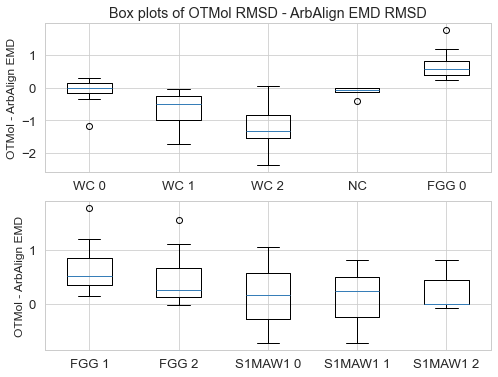

In [4]:
wc0_arbalign = pd.read_csv('./arbalign_emd_output/ArbAlignDataWC_result.csv')['RMSD(ArbAlign)']
wc1_arbalign = pd.read_csv('./arbalign_emd_output/1st2ndWC_result.csv')['RMSD(ArbAlign)']
wc2_arbalign = pd.read_csv('./arbalign_emd_output/largest_RMSD_WC_result.csv')['RMSD(ArbAlign)']
ng_arbalign = pd.read_csv('./arbalign_emd_output/NeonCluster_result.csv')['RMSD(ArbAlign)']
FGG_arbalign_name = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+element name)']
FGG_arbalign_type = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+atom type)']
FGG_arbalign_conn = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+atom connectivity)']
S1MAW1_arbalign_name = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+element name)']
S1MAW1_arbalign_type = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom type)']
S1MAW1_arbalign_conn = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom connectivity)']

wc0_otmol = pd.read_csv('./otmol_output/wc_ArbAlignDataWC_emd_results.csv')['RMSD(OTMol)']
wc1_otmol = pd.read_csv('./otmol_output/wc_1st2nd_emd_results.csv')['RMSD(OTMol)']
wc2_otmol = pd.read_csv('./otmol_output/wc_largest_rmsd_emd_results.csv')['RMSD(OTMol)']
ng_otmol = pd.read_csv('./otmol_output/ng_emd_results.csv')['RMSD(OTMol)']
FGG_otmol_name = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.5_results.csv')['RMSD(OTMol+element name)']
FGG_otmol_type = pd.read_csv('./otmol_output/FGG_atom_type_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom type)']
FGG_otmol_conn = pd.read_csv('./otmol_output/FGG_atom_connectivity_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom connectivity)']
S1MAW1_otmol_name = pd.read_csv('./otmol_output/S1MAW1_element_name_fGW_cstD=1.0_results.csv')['RMSD(OTMol+element name)']
S1MAW1_otmol_type = pd.read_csv('./otmol_output/S1MAW1_atom_type_fGW_cstD=1.0_results.csv')['RMSD(OTMol+atom type)']
S1MAW1_otmol_conn = pd.read_csv('./otmol_output/S1MAW1_atom_connectivity_fGW_cstD=1.0_results.csv')['RMSD(OTMol+atom connectivity)']

wc0_diff = wc0_otmol - wc0_arbalign
wc1_diff = wc1_otmol - wc1_arbalign
wc2_diff = wc2_otmol - wc2_arbalign
ng_diff = ng_otmol - ng_arbalign
FGG_name_diff = FGG_otmol_name - FGG_arbalign_name
FGG_type_diff = FGG_otmol_type - FGG_arbalign_type
FGG_conn_diff = FGG_otmol_conn - FGG_arbalign_conn
S1MAW1_name_diff = S1MAW1_otmol_name - S1MAW1_arbalign_name
S1MAW1_type_diff = S1MAW1_otmol_type - S1MAW1_arbalign_type
S1MAW1_conn_diff = S1MAW1_otmol_conn - S1MAW1_arbalign_conn
all_data = [
    wc0_diff, wc1_diff, wc2_diff, ng_diff,
    FGG_name_diff, FGG_type_diff, FGG_conn_diff,
    S1MAW1_name_diff, S1MAW1_type_diff, S1MAW1_conn_diff
]
labels = [
    'WC 0', 'WC 1', 'WC 2', 'NC',
    'FGG 0', 'FGG 1', 'FGG 2',
    'S1MAW1 0', 'S1MAW1 1', 'S1MAW1 2'
]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1") 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired size
axs[0].boxplot(all_data[:-5])
axs[0].set_title('Box plots of OTMol RMSD - ArbAlign EMD RMSD')
axs[0].set_xticks(
    [y + 1 for y in range(len(all_data[:-5]))],
    labels=labels[:-5]
)
#axs[0].set_xlabel('Different datasets')
axs[0].set_ylabel('OTMol - ArbAlign EMD', fontsize=12)
axs[0].yaxis.grid(True)

axs[1].boxplot(all_data[-5:])
#axs[1].set_title('')
axs[1].set_xticks(
    [y + 1 for y in range(len(all_data[-5:]))],
    labels=labels[-5:]
)
axs[1].set_ylabel('OTMol - ArbAlign EMD', fontsize=12)
axs[1].yaxis.grid(True)
plt.savefig('../images/boxplot_arbalign_emd.png', dpi=300, bbox_inches='tight')
plt.show()

c = 0.5 - c = 0

In [ ]:
"""
cp0_otmol = pd.read_csv('./otmol_output/cp_most_similar_fGW_cstD=0.0_results.csv')['RMSD(OTMol)']
cp1_otmol = pd.read_csv('./otmol_output/cp_most_different_fGW_cstD=0.0_results.csv')['RMSD(OTMol)']
cp2_otmol = pd.read_csv('./otmol_output/cp_largest_arbalign_fGW_cstD=0.0_results.csv')['RMSD(OTMol)']
FGG_otmol_name = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.0_results.csv')['RMSD(OTMol+element name)']
FGG_otmol_type = pd.read_csv('./otmol_output/FGG_atom_type_fGW_cstD=0.0_results.csv')['RMSD(OTMol+atom type)']
FGG_otmol_conn = pd.read_csv('./otmol_output/FGG_atom_connectivity_fGW_cstD=0.0_results.csv')['RMSD(OTMol+atom connectivity)']
S1MAW1_otmol_name = pd.read_csv('./otmol_output/S1MAW1_element_name_fGW_cstD=0.0_results.csv')['RMSD(OTMol+element name)']
S1MAW1_otmol_type = pd.read_csv('./otmol_output/S1MAW1_atom_type_fGW_cstD=0.0_results.csv')['RMSD(OTMol+atom type)']
S1MAW1_otmol_conn = pd.read_csv('./otmol_output/S1MAW1_atom_connectivity_fGW_cstD=0.0_results.csv')['RMSD(OTMol+atom connectivity)']

cp0_otmol_ = pd.read_csv('./otmol_output/cp_most_similar_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
cp1_otmol_ = pd.read_csv('./otmol_output/cp_most_different_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
cp2_otmol_ = pd.read_csv('./otmol_output/cp_largest_arbalign_fGW_cstD=0.5_results.csv')['RMSD(OTMol)']
FGG_otmol_name_ = pd.read_csv('./otmol_output/FGG_element_name_fGW_cstD=0.5_results.csv')['RMSD(OTMol+element name)']
FGG_otmol_type_ = pd.read_csv('./otmol_output/FGG_atom_type_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom type)']
FGG_otmol_conn_ = pd.read_csv('./otmol_output/FGG_atom_connectivity_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom connectivity)']
S1MAW1_otmol_name_ = pd.read_csv('./otmol_output/S1MAW1_element_name_fGW_cstD=0.5_results.csv')['RMSD(OTMol+element name)']
S1MAW1_otmol_type_ = pd.read_csv('./otmol_output/S1MAW1_atom_type_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom type)']
S1MAW1_otmol_conn_ = pd.read_csv('./otmol_output/S1MAW1_atom_connectivity_fGW_cstD=0.5_results.csv')['RMSD(OTMol+atom connectivity)']

cp0_diff = cp0_otmol - cp0_otmol_
cp1_diff = cp1_otmol - cp1_otmol_
cp2_diff = cp2_otmol - cp2_otmol_
FGG_name_diff = FGG_otmol_name - FGG_otmol_name_
FGG_type_diff = FGG_otmol_type - FGG_otmol_type_
FGG_conn_diff = FGG_otmol_conn - FGG_otmol_conn_
S1MAW1_name_diff = S1MAW1_otmol_name - S1MAW1_otmol_name_
S1MAW1_type_diff = S1MAW1_otmol_type - S1MAW1_otmol_type_
S1MAW1_conn_diff = S1MAW1_otmol_conn - S1MAW1_otmol_conn_
all_data = [
    cp0_diff, cp1_diff, cp2_diff,
    FGG_name_diff, FGG_type_diff, FGG_conn_diff,
    S1MAW1_name_diff, S1MAW1_type_diff, S1MAW1_conn_diff
]
labels = [
    'CP 0', 'CP 1', 'CP 2',
    'FGG 0', 'FGG 1', 'FGG 2',
    'S1MAW1 0', 'S1MAW1 1', 'S1MAW1 2'
]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1") 
fig, axs = plt.subplots(figsize=(12, 4))
#plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired size
axs.boxplot(all_data)
axs.set_title('Comparison of OTMol RMSD when c = 0 or 0.5')
axs.set_xticks(
    [y + 1 for y in range(len(all_data))],
    labels=labels
)
#axs[0].set_xlabel('Different datasets')
axs.set_ylabel('RMSD (c = 0) - RMSD (c = 0.5)', fontsize=12)
axs.yaxis.grid(True)

#plt.savefig('../images/boxplot_c_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
"""

OTMol - GW

In [ ]:
"""
wc0_GW = pd.read_csv('./GW_output/wc_ArbAlignDataWC_results.csv')['RMSD(GW)']
wc1_GW = pd.read_csv('./GW_output/wc_1st2nd_results.csv')['RMSD(GW)']
wc2_GW = pd.read_csv('./GW_output/wc_largest_rmsd_results.csv')['RMSD(GW)']
ng_GW = pd.read_csv('./GW_output/ng_results.csv')['RMSD(GW)']
cp0_GW = pd.read_csv('./GW_output/cp_most_similar_results.csv')['RMSD(GW)']
cp1_GW = pd.read_csv('./GW_output/cp_most_different_results.csv')['RMSD(GW)']
cp2_GW = pd.read_csv('./GW_output/cp_largest_arbalign_results.csv')['RMSD(GW)']
FGG_GW_name = pd.read_csv('./GW_output/FGG_element_name_results.csv')['RMSD(GW+element name)']
FGG_GW_type = pd.read_csv('./GW_output/FGG_atom_type_results.csv')['RMSD(GW+atom type)']
FGG_GW_conn = pd.read_csv('./GW_output/FGG_atom_connectivity_results.csv')['RMSD(GW+atom connectivity)']
S1MAW1_GW_name = pd.read_csv('./GW_output/S1MAW1_element_name_results.csv')['RMSD(GW+element name)']
S1MAW1_GW_type = pd.read_csv('./GW_output/S1MAW1_atom_type_results.csv')['RMSD(GW+atom type)']
S1MAW1_GW_conn = pd.read_csv('./GW_output/S1MAW1_atom_connectivity_results.csv')['RMSD(GW+atom connectivity)']

wc0_otmol = pd.read_csv('./otmol_output/wc_ArbAlignDataWC_emd_results.csv')['RMSD(OTMol)']
wc1_otmol = pd.read_csv('./otmol_output/wc_1st2nd_emd_results.csv')['RMSD(OTMol)']
wc2_otmol = pd.read_csv('./otmol_output/wc_largest_rmsd_emd_results.csv')['RMSD(OTMol)']
ng_otmol = pd.read_csv('./otmol_output/ng_emd_results.csv')['RMSD(OTMol)']
cp0_otmol = pd.read_csv('./otmol_output/cp_most_similar_fGW_emd_results.csv')['RMSD(OTMol)']
cp1_otmol = pd.read_csv('./otmol_output/cp_most_different_fGW_emd_results.csv')['RMSD(OTMol)']
cp2_otmol = pd.read_csv('./otmol_output/cp_largest_arbalign_fGW_emd_results.csv')['RMSD(OTMol)']
FGG_otmol_name = pd.read_csv('./otmol_output/FGG_element_name_fGW_emd_results.csv')['RMSD(OTMol+element name)']
FGG_otmol_type = pd.read_csv('./otmol_output/FGG_atom_type_fGW_emd_results.csv')['RMSD(OTMol+atom type)']
FGG_otmol_conn = pd.read_csv('./otmol_output/FGG_atom_connectivity_fGW_emd_results.csv')['RMSD(OTMol+atom connectivity)']
S1MAW1_otmol_name = pd.read_csv('./otmol_output/S1MAW1_element_name_fGW_emd_results.csv')['RMSD(OTMol+element name)']
S1MAW1_otmol_type = pd.read_csv('./otmol_output/S1MAW1_atom_type_fGW_emd_results.csv')['RMSD(OTMol+atom type)']
S1MAW1_otmol_conn = pd.read_csv('./otmol_output/S1MAW1_atom_connectivity_fGW_emd_results.csv')['RMSD(OTMol+atom connectivity)']

wc0_diff = wc0_otmol - wc0_GW
wc1_diff = wc1_otmol - wc1_GW
wc2_diff = wc2_otmol - wc2_GW
ng_diff = ng_otmol - ng_GW
cp0_diff = cp0_otmol - cp0_GW
cp1_diff = cp1_otmol - cp1_GW
cp2_diff = cp2_otmol - cp2_GW
FGG_otmol_name_diff = FGG_otmol_name - FGG_GW_name
FGG_otmol_type_diff = FGG_otmol_type - FGG_GW_type
FGG_otmol_conn_diff = FGG_otmol_conn - FGG_GW_conn
S1MAW1_otmol_name_diff = S1MAW1_otmol_name - S1MAW1_GW_name
S1MAW1_otmol_type_diff = S1MAW1_otmol_type - S1MAW1_GW_type
S1MAW1_otmol_conn_diff = S1MAW1_otmol_conn - S1MAW1_GW_conn
all_data = [
    wc0_diff, wc1_diff, wc2_diff, ng_diff, cp0_diff, cp1_diff, cp2_diff,
    FGG_otmol_name_diff, FGG_otmol_type_diff, FGG_otmol_conn_diff,
    S1MAW1_otmol_name_diff, S1MAW1_otmol_type_diff, S1MAW1_otmol_conn_diff
]
labels = [
    'WC 0', 'WC 1', 'WC 2', 
    'NC', 'CP 0', 'CP 1', 'CP 2',
    'FGG \n(element name)', 'FGG \n(SYBYL type)', 'FGG \n(atom connectivity)',
    'S1MAW1 \n(element name)', 'S1MAW1 \n(SYBYL type)', 'S1MAW1 \n(atom connectivity)'
]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1") 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired size
axs[0].boxplot(all_data[:-6])
axs[0].set_title('Box plots of OTMol RMSD - GW RMSD for all datasets')
axs[0].set_xticks(
    [y + 1 for y in range(len(all_data[:-6]))],
    labels=labels[:-6]
)
#axs[0].set_xlabel('Different datasets')
axs[0].set_ylabel('OTMol RMSD - GW RMSD')
axs[0].yaxis.grid(True)

axs[1].boxplot(all_data[-6:])
#axs[1].set_title('')
axs[1].set_xticks(
    [y + 1 for y in range(len(all_data[-6:]))],
    labels=labels[-6:]
)
#axs[0].set_xlabel('Different datasets')
axs[1].set_ylabel('OTMol RMSD - GW RMSD')
axs[1].yaxis.grid(True)
plt.savefig('../images/boxplot_GW.png', dpi=300, bbox_inches='tight')
plt.show()
"""

ArbAlign EMD - ArbAlign

In [ ]:
wc0_arbalign_emd = pd.read_csv('./arbalign_emd_output/ArbAlignDataWC_result.csv')['RMSD(ArbAlign)']
wc1_arbalign_emd = pd.read_csv('./arbalign_emd_output/1st2ndWC_result.csv')['RMSD(ArbAlign)']
wc2_arbalign_emd = pd.read_csv('./arbalign_emd_output/largest_RMSD_WC_result.csv')['RMSD(ArbAlign)']
ng_arbalign_emd = pd.read_csv('./arbalign_emd_output/NeonCluster_result.csv')['RMSD(ArbAlign)']
cp0_arbalign_emd = pd.read_csv('./arbalign_emd_output/cp_most_similar_result.csv')['RMSD(ArbAlign)']
cp1_arbalign_emd = pd.read_csv('./arbalign_emd_output/cp_most_different_result.csv')['RMSD(ArbAlign)']
cp2_arbalign_emd = pd.read_csv('./arbalign_emd_output/cp_largest_arbalign_result.csv')['RMSD(ArbAlign)']
FGG_arbalign_name_emd = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+element name)']
FGG_arbalign_type_emd = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+atom type)']
FGG_arbalign_conn_emd = pd.read_csv('./arbalign_emd_output/FGG_result.csv')['RMSD(ArbAlign+atom connectivity)']
S1MAW1_arbalign_name_emd = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+element name)']
S1MAW1_arbalign_type_emd = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom type)']
S1MAW1_arbalign_conn_emd = pd.read_csv('./arbalign_emd_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom connectivity)']

wc0_arbalign = pd.read_csv('./arbalign_output/ArbAlignDataWC_result.csv')['RMSD(ArbAlign)']
wc1_arbalign = pd.read_csv('./arbalign_output/1st2ndWC_result.csv')['RMSD(ArbAlign)']
wc2_arbalign = pd.read_csv('./arbalign_output/largest_RMSD_WC_result.csv')['RMSD(ArbAlign)']
ng_arbalign = pd.read_csv('./arbalign_output/NeonCluster_result.csv')['RMSD(ArbAlign)']
cp0_arbalign = pd.read_csv('./arbalign_output/cp_most_similar_result.csv')['RMSD(ArbAlign)']
cp1_arbalign = pd.read_csv('./arbalign_output/cp_most_different_result.csv')['RMSD(ArbAlign)']
cp2_arbalign = pd.read_csv('./arbalign_output/cp_largest_arbalign_result.csv')['RMSD(ArbAlign)']
FGG_arbalign_name = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+element name)']
FGG_arbalign_type = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+atom type)']
FGG_arbalign_conn = pd.read_csv('./arbalign_output/FGG_result.csv')['RMSD(ArbAlign+atom connectivity)']
S1MAW1_arbalign_name = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+element name)']
S1MAW1_arbalign_type = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom type)']
S1MAW1_arbalign_conn = pd.read_csv('./arbalign_output/S1MAW1_result.csv')['RMSD(ArbAlign+atom connectivity)']

wc0_diff = wc0_arbalign_emd - wc0_arbalign
wc1_diff = wc1_arbalign_emd - wc1_arbalign
wc2_diff = wc2_arbalign_emd - wc2_arbalign
ng_diff = ng_arbalign_emd - ng_arbalign
cp0_diff = cp0_arbalign_emd - cp0_arbalign
cp1_diff = cp1_arbalign_emd - cp1_arbalign
cp2_diff = cp2_arbalign_emd - cp2_arbalign
FGG_otmol_name_diff = FGG_arbalign_name_emd - FGG_arbalign_name
FGG_otmol_type_diff = FGG_arbalign_type_emd - FGG_arbalign_type
FGG_otmol_conn_diff = FGG_arbalign_conn_emd - FGG_arbalign_conn
S1MAW1_otmol_name_diff = S1MAW1_arbalign_name_emd - S1MAW1_arbalign_name
S1MAW1_otmol_type_diff = S1MAW1_arbalign_type_emd - S1MAW1_arbalign_type
S1MAW1_otmol_conn_diff = S1MAW1_arbalign_conn_emd - S1MAW1_arbalign_conn
all_data = [
    wc0_diff, wc1_diff, wc2_diff, ng_diff, cp0_diff, cp1_diff, cp2_diff,
    FGG_otmol_name_diff, FGG_otmol_type_diff, FGG_otmol_conn_diff,
    S1MAW1_otmol_name_diff, S1MAW1_otmol_type_diff, S1MAW1_otmol_conn_diff
]
labels = [
    'WC 0', 'WC 1', 'WC 2', 
    'NC', 'CP 0', 'CP 1', 'CP 2',
    'FGG \n(element name)', 'FGG \n(SYBYL type)', 'FGG \n(atom connectivity)',
    'S1MAW1 \n(element name)', 'S1MAW1 \n(SYBYL type)', 'S1MAW1 \n(atom connectivity)'
]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1") 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired size
axs[0].boxplot(all_data[:-6])
axs[0].set_title('Box plot of ArbAlign (EMD) RMSD - ArbAlign RMSD for all datasets')
axs[0].set_xticks(
    [y + 1 for y in range(len(all_data[:-6]))],
    labels=labels[:-6]
)
#axs[0].set_xlabel('Different datasets')
axs[0].set_ylabel('ArbAlign (EMD) RMSD - ArbAlign RMSD')
axs[0].yaxis.grid(True)

axs[1].boxplot(all_data[-6:])
#axs[1].set_title('')
axs[1].set_xticks(
    [y + 1 for y in range(len(all_data[-6:]))],
    labels=labels[-6:]
)
#axs[0].set_xlabel('Different datasets')
axs[1].set_ylabel('ArbAlign (EMD) RMSD - ArbAlign RMSD')
axs[1].yaxis.grid(True)
#plt.savefig('../images/boxplot.png', dpi=300, bbox_inches='tight')
plt.show()